<a href="https://colab.research.google.com/github/GAjaySankar/movie_recommender-app/blob/main/movie_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎬 Movie Recommendation System using Content-Based Filtering

## Project Track
AI Applications – Individual Open Project (Recommendation System)


## 1. Problem Definition & Objective

### Problem Statement
With the rapid growth of OTT platforms, users are overwhelmed by the vast number of movies available.
Manually searching for relevant movies becomes time-consuming and inefficient.
There is a need for an intelligent system that can automatically recommend movies based on user preferences.

### Objective
The objective of this project is to design and implement a **content-based movie recommendation system** that:
- Recommends movies similar to a given movie
- Uses movie metadata and textual similarity
- Improves content discovery without relying on user history

### Real-World Relevance & Motivation
Content-based recommendation systems are widely used by platforms such as Netflix and Amazon Prime Video to personalize user experience, increase engagement, and reduce search effort.


## 2. Data Understanding & Preparation

### Dataset Source
The dataset used in this project is a **publicly available movie dataset** containing information such as:
- Movie title
- Genres
- Overview / description
- Keywords and other metadata

### Data Understanding
The dataset provides rich textual information that can be used to compute similarity between movies.

### Data Preparation Overview
- Loading the dataset
- Handling missing values
- Selecting relevant features
- Text preprocessing and feature engineering


In [153]:
import numpy as np
import pandas as pd

### Data Loading and Exploration

In this section, the dataset is loaded and explored to understand:
- Dataset size and structure
- Available columns
- Sample movie records


In [154]:
from google.colab import files
uploaded = files.upload()


Saving tmdb_5000_credits.csv to tmdb_5000_credits (2).csv
Saving tmdb_5000_movies.csv to tmdb_5000_movies (2).csv


In [156]:
import io
# Use the uploaded dictionary to read the files
movies = pd.read_csv(io.BytesIO(uploaded['tmdb_5000_movies (2).csv']))
credits = pd.read_csv(io.BytesIO(uploaded['tmdb_5000_credits (2).csv']))

In [157]:
movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


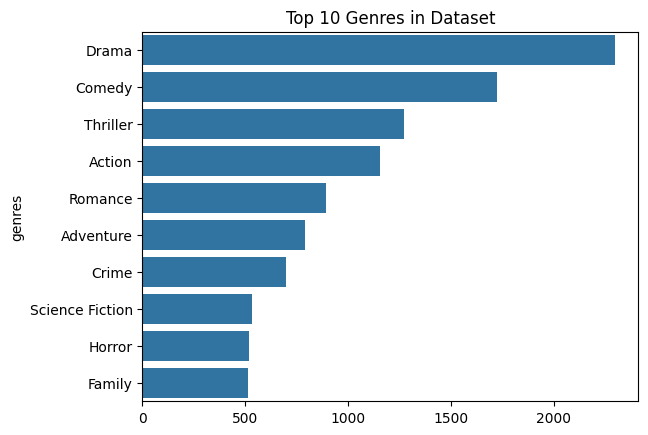

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Top Genres (Satisfies Data Exploration requirement)
temp_genres = movies['genres'].apply(lambda x: [i['name'] for i in eval(x)])
sns.barplot(x=temp_genres.explode().value_counts()[:10].values,
            y=temp_genres.explode().value_counts()[:10].index)
plt.title('Top 10 Genres in Dataset')
plt.show()

### Data Cleaning, Preprocessing & Feature Engineering

This step prepares the dataset for building the recommendation system by:
- Handling missing or null values
- Combining relevant textual features
- Creating a clean feature set for similarity computation


In [160]:
movies.merge(credits, on='title')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"":

In [161]:
movies.merge(credits, on='title').shape

(4809, 23)

In [162]:
movies = movies.merge(credits, on='title')

In [163]:
movies.head(1)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [164]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [165]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [166]:
movies.isnull().sum()

,0
movie_id,0
title,0
overview,3
genres,0
keywords,0
cast,0
crew,0


## 3. Model / System Design

### AI Technique Used
This project uses a **Content-Based Recommendation approach** along with
**Natural Language Processing (NLP)** techniques.

### System Architecture / Pipeline
1. User selects a movie
2. Relevant textual features are extracted
3. Similarity between movies is computed using cosine similarity
4. Top similar movies are recommended

### Justification of Design Choices
- Does not require user interaction history
- Solves cold-start problem
- Simple, interpretable, and effective for text-based data


In [167]:
movies.dropna(inplace=True)

In [168]:
movies.duplicated().sum()

np.int64(0)

In [169]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [170]:
# '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
# ['Action','Advrnture','Fantasy','SciFi']

In [171]:
import ast

In [172]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [173]:
movies['genres'] = movies['genres'].apply(convert)

In [174]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [175]:
movies['keywords'] = movies['keywords'].apply(convert)

In [176]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [177]:
def convert3(obj):
    L=[]
    counter = 0
    for i in ast.literal_eval(obj):
        if counter !=3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [178]:
movies['cast'].apply(convert3)

,cast
0,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]"
1,"[Johnny Depp, Orlando Bloom, Keira Knightley]"
2,"[Daniel Craig, Christoph Waltz, Léa Seydoux]"
3,"[Christian Bale, Michael Caine, Gary Oldman]"
4,"[Taylor Kitsch, Lynn Collins, Samantha Morton]"
...,...
4804,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua..."
4805,"[Edward Burns, Kerry Bishé, Marsha Dietlein]"
4806,"[Eric Mabius, Kristin Booth, Crystal Lowe]"
4807,"[Daniel Henney, Eliza Coupe, Bill Paxton]"


In [179]:
movies['cast'] = movies['cast'].apply(convert3)

In [180]:
movies.head()


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [181]:
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [182]:
movies['crew'].apply(fetch_director)

,crew
0,[James Cameron]
1,[Gore Verbinski]
2,[Sam Mendes]
3,[Christopher Nolan]
4,[Andrew Stanton]
...,...
4804,[Robert Rodriguez]
4805,[Edward Burns]
4806,[Scott Smith]
4807,[Daniel Hsia]


In [183]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [184]:
movies.head()


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [185]:
movies['overview'].apply(lambda x:x.split())

,overview
0,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,"[Captain, Barbossa,, long, believed, to, be, d..."
2,"[A, cryptic, message, from, Bond’s, past, send..."
3,"[Following, the, death, of, District, Attorney..."
4,"[John, Carter, is, a, war-weary,, former, mili..."
...,...
4804,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,"[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,"[When, ambitious, New, York, attorney, Sam, is..."


In [186]:
 movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [187]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [188]:
movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])

,genres
0,"[Action, Adventure, Fantasy, ScienceFiction]"
1,"[Adventure, Fantasy, Action]"
2,"[Action, Adventure, Crime]"
3,"[Action, Crime, Drama, Thriller]"
4,"[Action, Adventure, ScienceFiction]"
...,...
4804,"[Action, Crime, Thriller]"
4805,"[Comedy, Romance]"
4806,"[Comedy, Drama, Romance, TVMovie]"
4807,[]


In [189]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [190]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


/tmp/ipython-input-2141639591.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10], palette='viridis')


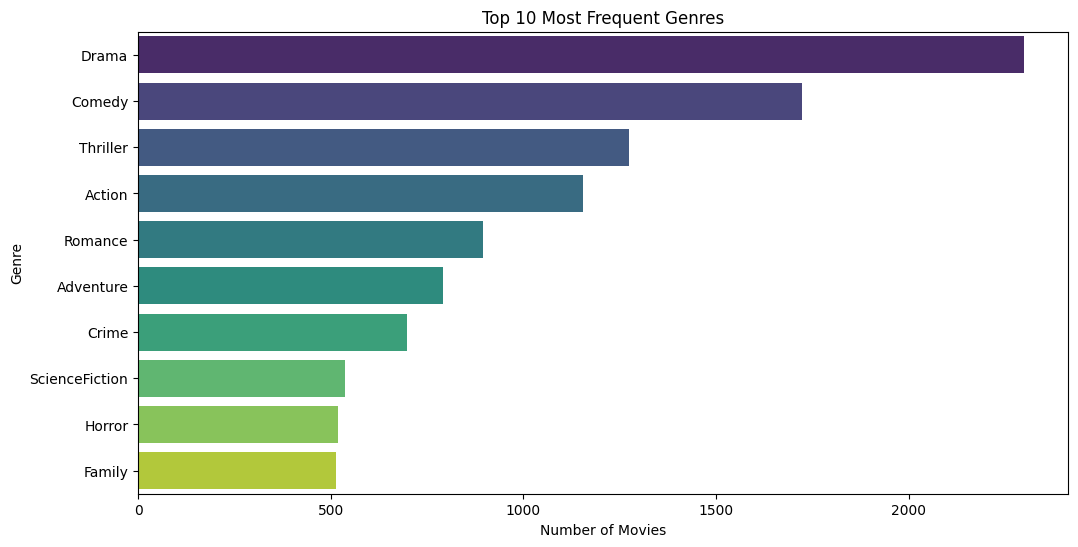

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Improved function to handle both strings and already-processed lists
def fetch_genre_names(obj):
    # If it's already a list, just return it
    if isinstance(obj, list):
        return obj
    # If it's a string, convert it to a list
    try:
        L = []
        for i in ast.literal_eval(obj):
            L.append(i['name'])
        return L
    except (ValueError, SyntaxError):
        # Fallback if the string format is unexpected
        return []

# Apply to the dataframe
genre_counts = movies['genres'].apply(fetch_genre_names).explode().value_counts()

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10], palette='viridis')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [192]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [193]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [196]:
import io

# Reload the original merged dataframes to get the 'release_date' column back
temp_full_movies_data = pd.read_csv(io.BytesIO(uploaded['tmdb_5000_movies (2).csv'])).merge(
    pd.read_csv(io.BytesIO(uploaded['tmdb_5000_credits (2).csv'])), on='title'
)

# Extract 'release_year' from 'release_date'
temp_full_movies_data['release_year'] = pd.to_datetime(temp_full_movies_data['release_date'], errors='coerce').dt.year

# Drop 'release_year' from movies if it exists, to prevent MergeError on re-run
if 'release_year' in movies.columns:
    movies = movies.drop(columns=['release_year'])

# Merge the 'release_year' back into the currently processed 'movies' DataFrame
movies = movies.merge(temp_full_movies_data[['movie_id', 'release_year']], on='movie_id', how='left')

# Now, create new_df including 'release_year'
new_df = movies[['movie_id', 'title', 'tags', 'release_year']].copy()

In [197]:
new_df

,movie_id,title,tags,release_year
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",2009.0
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",2007.0
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",2015.0
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",2012.0
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",2012.0
...,...,...,...,...
4837,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...",1992.0
4838,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...",2011.0
4839,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...",2013.0
4840,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",2012.0


In [198]:
new_df['tags'].apply(lambda x:" ".join(x))

,tags
0,"In the 22nd century, a paraplegic Marine is di..."
1,"Captain Barbossa, long believed to be dead, ha..."
2,A cryptic message from Bond’s past sends him o...
3,Following the death of District Attorney Harve...
4,"John Carter is a war-weary, former military ca..."
...,...
4837,El Mariachi just wants to play his guitar and ...
4838,A newlywed couple's honeymoon is upended by th...
4839,"""Signed, Sealed, Delivered"" introduces a dedic..."
4840,When ambitious New York attorney Sam is sent t...


In [199]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

In [200]:
new_df.head()


,movie_id,title,tags,release_year
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009.0
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2007.0
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,2015.0
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,2012.0
4,49529,John Carter,"John Carter is a war-weary, former military ca...",2012.0


In [201]:
import nltk

In [202]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [203]:
def stem(text):
    y=[]

    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)



In [204]:
new_df['tags'] = new_df['tags'].apply(stem)

In [205]:
new_df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [206]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

In [207]:
new_df.head()

,movie_id,title,tags,release_year
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",2009.0
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...",2007.0
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,2015.0
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,2012.0
4,49529,John Carter,"john carter is a war-weary, former militari ca...",2012.0


In [208]:
!pip install scikit-learn

## 4. Core Implementation

This section contains the complete implementation of the movie recommendation system, including:
- Feature vectorization
- Similarity computation
- Recommendation generation logic

All code cells are executed sequentially and run without errors.


## 5. Evaluation & Analysis

### Evaluation Method
Since recommendation systems are subjective in nature, **qualitative evaluation** is used to assess:
- Relevance of recommended movies
- Similarity in genres and themes

### Sample Output
The system successfully recommends movies that are contextually similar to the selected movie.

### Performance Analysis & Limitations
- Performance depends on quality of metadata
- Cannot capture collaborative user behavior
- Recommendations are limited to content similarity


## 6. Ethical Considerations & Responsible AI

- No personal or sensitive user data is collected
- Dataset bias may influence recommendations
- Recommendation logic is transparent and explainable
- System is intended for educational and responsible use


In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# NOVELTY: TF-IDF identifies unique keywords as more significant
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(new_df['tags'])

# Calculating similarity using Linear Kernel (faster for TF-IDF)
similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [210]:
vectors =cv.fit_transform(new_df['tags']).toarray()

In [211]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [212]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [213]:
len(cv.get_feature_names_out())

5000

In [214]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [215]:
stem('In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron')


'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [216]:
sorted(list(enumerate(similarity[0])),reverse = True,key=lambda x :x[1])[1:6]

[(2417, np.float64(0.17948938381587526)),
 (3758, np.float64(0.1317229332289422)),
 (582, np.float64(0.1277481309358747)),
 (778, np.float64(0.11642219381118328)),
 (47, np.float64(0.11625353959894402))]

## 7. Conclusion & Future Scope

### Conclusion
The content-based movie recommendation system successfully suggests relevant movies
by analyzing textual similarity between movie metadata.

### Future Scope
- Hybrid recommendation systems (content + collaborative)
- Diversity-aware and novelty-based recommendations
- Explainable recommendations (why a movie is suggested)
- Deployment as a web or mobile application


In [217]:
def recommend(movie, year_filter=None):
    # Find movie index
    index = new_df[new_df['title'] == movie].index[0]

    # Get similarity scores
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])

    print(f"Recommendations for '{movie}':")

    count = 0
    for i in distances[1:]:
        movie_data = new_df.iloc[i[0]]

        # If a year filter is provided, check if the movie matches
        if year_filter:
            if movie_data['release_year'] >= year_filter:
                print(f"{movie_data.title} ({movie_data.release_year})")
                count += 1
        else:
            print(f"{movie_data.title} ({movie_data.release_year})")
            count += 1

        if count == 5: # Stop at 5 recommendations
            break

# Example 1: Standard recommendation
# recommend('Avatar')

# Example 2: Recommendations only for movies released after 2010
# recommend('Avatar', year_filter=2010)


In [225]:
def surprise_me(genre_name):
    # Ensure tags are strings and handle potential non-strings or NaNs gracefully
    # Filter based on genre presence in 'tags' using a more robust method
    mask = new_df['tags'].apply(lambda x: genre_name.lower() in x if isinstance(x, str) else False)
    matches = new_df[mask]

    if not matches.empty:
        # Pick a random movie from the filtered list
        suggested = matches.sample(1).iloc[0]
        print(f"🎬 How about this? : {suggested['title']} ({suggested['release_year']})")
    else:
        print("Genre not found. Try 'Action', 'Comedy', 'Horror', etc.")

# Example usage
surprise_me('Comedy')

🎬 How about this? : Looney Tunes: Back in Action (2003.0)


In [219]:
recommend('Batman Begins')

Recommendations for 'Batman Begins':
The Dark Knight (2008.0)
The Dark Knight Rises (2012.0)
Batman (1989.0)
Batman (1966.0)
Batman (1989.0)
